### En este notebook se hará una limpieza superficial a los datos. Las tareas realizadas son:

-Corrección de nombres de columnas.

-Correccion de los caracteres especiales.

-Correcion de las casas cuyo Precio estaba en metros cuadrados.

-Division de la columna con los elementos divididos en una lista.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import re
pd.set_option('display.max_columns', None) #Para mostrar todas las columnas

In [2]:
df = pd.read_csv('database_urbania.csv')
df.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)
#df.columns = nuevas_cols #Corregimos el nombre con la lista de arriba.

In [4]:
nuevas_cols = ['Adicionales', 'Ambientes', 'Antiguedad', 'Anunciante','Area_Terreno','Balneario','NroBanios',
               'Nro_pisos','Cocheras','Descripcion','Direccion','Disposicion','Dormitorios','EsCondominio',
              'Estado de Inmueble', 'Fecha_pub', 'Fila', 'Fondo','Frente', 'Generales', 'Luminosidad', 
               'Mantenimiento', 'Mascotas','Medidas','NoTieneAlgunDatoExtra','Pisos_construibles','TipoPuertaCochera',
               'Precio','Referencia','Servicios','Tipo','TipoCochera','Ubicacion','Urbaniz',
               'Uso_comercial','Uso_profesional','latitud','longitud','Area_constr','Area_total','Areas_comunes']

In [5]:
df.columns

Index(['Adicionales', 'Ambientes', 'Antiguedad', 'Anunciante',
       'Area de Terreno', 'Balneario', 'BaÃ±os', 'Cantidad de pisos',
       'Cocheras', 'Descripcion_', 'Direccion', 'DisposiciÃ³n', 'Dormitorios',
       'EsCondominio', 'Estado de Inmueble', 'Fecha_pub', 'Fila', 'Fondo',
       'Frente', 'Generales', 'Luminosidad', 'Mantenimiento', 'Mascotas',
       'Medidas', 'NoTieneAlgunDatoExtra', 'Pisos construibles',
       'PortÃ³n Cochera', 'Precio', 'Referencia', 'Servicios', 'Tipo',
       'Tipo de Cochera', 'UbicaciÃ³n', 'UrbanizaciÃ³n', 'Uso comercial',
       'Uso profesional', 'latitud', 'longitud', 'Ãrea Construida',
       'Ãrea Total', 'Ãreas comunes'],
      dtype='object')

C:\Users\pablo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pablo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


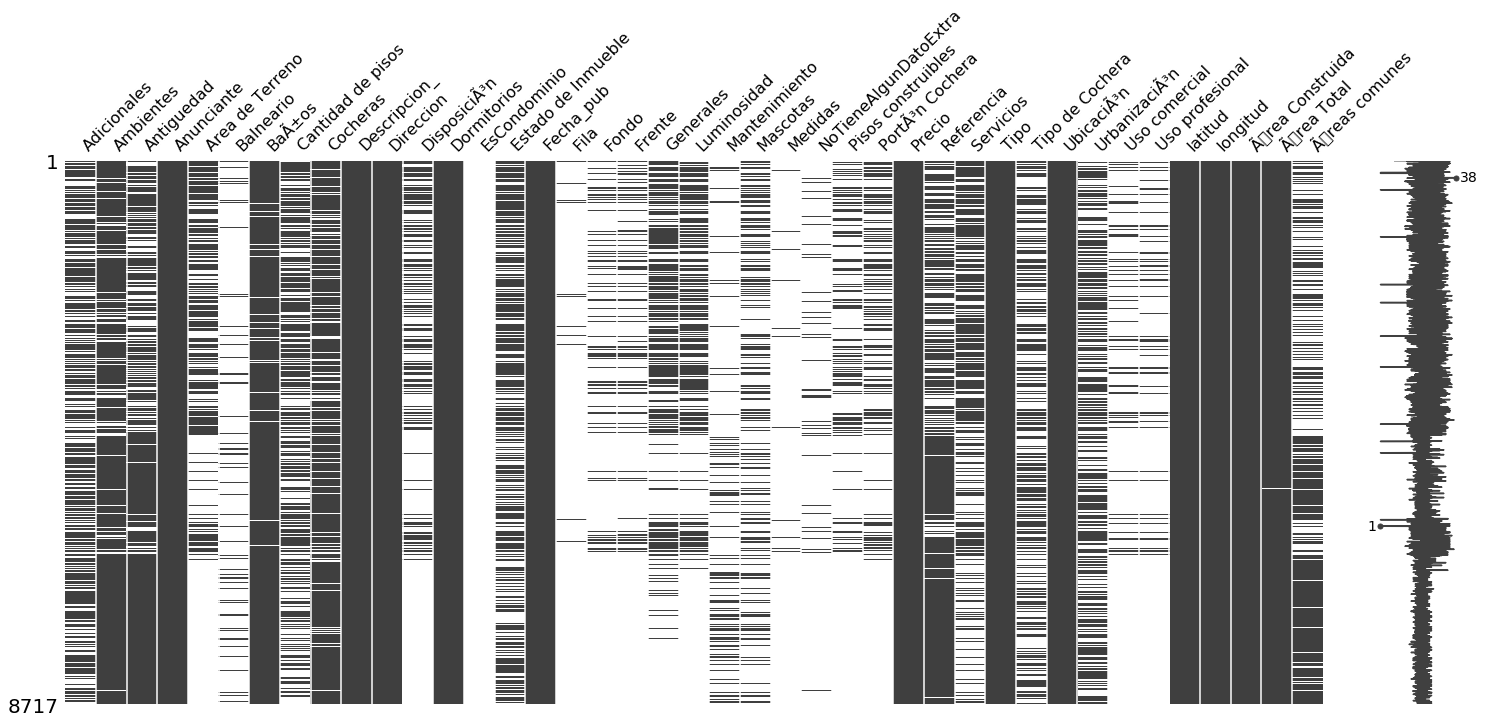

In [6]:
import missingno as ms
ms.matrix(df)

#### Haremos limpieza de los datos. Existen datos que están en un mal formato para hacer posteriormente el análisis.


In [7]:
df.columns = nuevas_cols

In [8]:
df.Dormitorios = df.Dormitorios.replace({'5 a mÃ¡s':'5+'}) #Reemplazo

In [9]:
#Usamos expresiones regulares para corregir algunas columnas. 
df['Antiguedad'] = df['Antiguedad'].str.extract('(\d)', expand = True).astype('float32')

In [10]:
#Limpiaré las areas de los m2 con regex
df['Area_constr_m2'] = df['Area_constr'].str.extract('(\d{0,3}.?)')
df['Area_total_m2'] = df['Area_total'].str.extract('(\d{0,3}.?)')
df['Area_Terreno_m2'] = df['Area_Terreno'].str.extract('(\d{0,3}.?)')

In [11]:
dict_replacement = {"Ã³":"o","Ã±":"ni","Ã©":"e",
                    "Ã\xad":"i","Ã\x81":"A","Ã":"a","\\":"n","aº":"u","Ã¼":"u","¼":"u",
                    "Acceso para personas con discapacidad":"Acceso personas discapacidad",
                   "anx81rea ":"Area","\\r":" " ,"a¡":"a",'"':'',',':'','\n':'','\t':'','    ':'','  ':''}
for word, initial in dict_replacement.items():
    df['Servicios'] = df['Servicios'].str.replace(word, initial)
    df['Ambientes'] = df['Ambientes'].str.replace(word,initial)
    df['Areas_comunes'] = df['Areas_comunes'].str.replace(word,initial)
    df['Generales'] = df['Generales'].str.replace(word,initial)
    df['Adicionales'] = df['Adicionales'].str.replace(word,initial)
    df['Descripcion'] = df['Descripcion'].str.replace(word,initial)
    df['longitud'] = df['longitud'].str.replace(word,initial)
    df['latitud'] = df['latitud'].str.replace(word,initial)

In [12]:
drop_condominio = df[df.latitud.isna()].index
df.drop(drop_condominio,inplace=True,axis=0)

In [15]:
df['Ubicacion'] = df['Ubicacion'].replace({'BreÃ±a-Lima':'Brenia-Lima', 'San Vicente De CaÃ±ete-Lima':'Caniete-Lima',
                                          'PariÃ±as-Piura':'Parianias-Piura','Los BaÃ±os Del Inca-Cajamarca':'Los Banios Del Inca-Cajamarca',
                                          'CaÃ±ete-Lima':'Caniete-Lima'})

In [17]:
df['Ubicacion'] = df['Ubicacion'].str.replace(' ','')  #Para que no existan discordancias entre los strings
dist_prov = df['Ubicacion'].str.extractall(r'(\w*?)?-(\w*)')
dist_prov.columns = ['Distrito','Provincia']
dist_prov.reset_index(inplace = True)
dist_prov.drop(columns = ['match'],inplace=True)
dist_prov.set_index('level_0',inplace=True)

In [18]:
#Haré split a las columnas que tienen valores como listas.
ola1 = df['Servicios'].str.extractall('(\[\'\w*\s?\w*?\s?\w*?\'),?\]?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?')
ola2 = df['Ambientes'].str.extractall('(\[\'\w*\s?\w*?\s?\w*?\'),?\]?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?')
ola3 = df['Areas_comunes'].str.extractall('(\[\'\w*\s?\w*?\s?\w*?\'),?\]?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?')
ola4 = df['Generales'].str.extractall('(\[\'\w*\s?\w*?\s?\w*?\'),?\]?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?')
ola5 = df['Adicionales'].str.extractall('(\[\'\w*\s?\w*?\s?\w*?\'),?\]?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?,?\s?(\'\w*\s?\w*?\s?\w*?\')?\]?')

In [13]:
#Hacer el reemplazo para solo una moneda
df['Precio']=df['Precio'].str.replace(",","")
index_casas_soles = df[(df['Precio'].str.startswith('US') == False) & (df['Precio'].str.startswith('Consultar') == False)].index
#Hasta acà los tengo almacenados en memoria.

In [14]:
df['Precio'].dtype

dtype('O')

In [16]:
#Limpio los US$ y S/ solo seleccionando los digits con regex
df['Precio'] = df['Precio'].str.extract('(\d{0,3},?\d{0,3},?\d{1,3}$)')

Ahora haremos join a las tablas que hemos creado

In [19]:
df['Precio'] = df['Precio'].astype('float64')
df.iloc[index_casas_soles - 1]['Precio'] = df.iloc[index_casas_soles -1]['Precio'].apply(lambda x: x*3.37)

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df['Area_constr_m2'] = df['Area_constr_m2'].astype('float64') 
df['Area_total_m2'] = df['Area_total_m2'].astype('float64')
df['Area_Terreno_m2'] = df['Area_Terreno_m2'].astype('float64') 

plt.figure(figsize = (10,8))
ax = sns.scatterplot(x='Area_total_m2',y='Precio',data= df)

y_max = df['Precio'].max()
ticks = [0, 0.25*y_max, 0.5*y_max, 0.75*y_max, y_max]

ax.set_ylim(ax.get_ylim()) # set second y axis to have the same limits as the first y axis
ax.set_yticks(ticks) 
ax.set_yticklabels(ticks) # set the labels
ax.grid(True)

In [21]:
df.head()

,Adicionales,Ambientes,Antiguedad,Anunciante,Area_Terreno,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Disposicion,Dormitorios,EsCondominio,Estado de Inmueble,Fecha_pub,Fila,Fondo,Frente,Generales,Luminosidad,Mantenimiento,Mascotas,Medidas,NoTieneAlgunDatoExtra,Pisos_construibles,TipoPuertaCochera,Precio,Referencia,Servicios,Tipo,TipoCochera,Ubicacion,Urbaniz,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr,Area_total,Areas_comunes,Area_constr_m2,Area_total_m2,Area_Terreno_m2
0,NaN,NaN,NaN,ENACORP S.A.,NaN,NaN,NaN,NaN,NaN,ENACORP presenta Condominio Club Casas del Va...,Av. San Juan s/n - Alt. Km. 30 Pan. Norte - Ca...,NaN,NaN,Si,NaN,Publicado el 18.09.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.859273499243,-77.086804881176,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,DPI,NaN,NaN,NaN,NaN,NaN,TU CASA LA MEJOR INVERSIaN Casas con la mejo...,"Altura km 39.5 Antigua Panamericana Sur Lurin,...",NaN,NaN,Si,NaN,Publicado el 16.09.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2526278,-76.884032,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,No disponible,NaN,NaN,NaN,NaN,NaN,EXCELENTE OPORTUNIDAD DE INVERTIR :inmueble e...,"Lima- BreÃ±a BreÃ±a, Lima, Lima",NaN,4,NaN,NaN,Publicado el 19.09.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NingunValor,NaN,NaN,185000.0,NaN,NaN,Casa en condominio,NaN,Brenia-Lima,NaN,NaN,NaN,12.05705300000000,-77.05168340000000,213.00 m2,128.00 m2,NaN,213.0,128.0,NaN
3,['Parrilla'],['anx81tico' 'Banio de servicio' 'Banio de vis...,5.0,Valentinoinmobiliaria,NaN,NaN,4.0,2.0,3.0,Excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",Frente,3,NaN,Excelente,Publicado el 19.09.19,NaN,NaN,NaN,NaN,Muy luminoso,NaN,Si,NaN,NaN,NaN,AutomÃ¡tico,885000.0,NaN,['Agua' 'Luz' 'Telefono'],Casa,Paralelas,LaMolina-Lima,La Planicie,No,NaN,12.07723240000000,-76.92949390000000,450.00 m2,600.00 m2,['Areade BBQ' 'Areadeportiva' 'Hall de ingreso...,450.0,600.0,NaN
4,['Desagaue'],['Balcon' 'Banio de servicio' 'Banio de visita...,5.0,No disponible,183.00 m2,NaN,5.0,3.0,1.0,HERMOSA CASA A ESPALDA DE FUTURA AVENIDA PROL...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,Frente,5+,NaN,Excelente,Publicado el 28.08.19,NaN,12.0,9.0,['Centros comerciales cercanos' 'Colegios cerc...,Muy luminoso,NaN,Si,NaN,NaN,4.0,Manual,150000.0,A una cuadra de Colegio Panamericano,['Agua' 'Luz' 'Telefono' 'Cable' 'Internet' 'G...,Casa,NaN,Lurigancho-Lima,San Antonio De Carapongo,Si,Si,12.00502154878552,-76.87265686505832,350.00 m2,183.00 m2,NaN,350.0,183.0,183.0


In [22]:
##Reviso outliers.
index_ = df[(df['Precio']<=10000)&(df['Ubicacion']=='Cusco-Cusco')].index #Los que tienes de ubicación Cusco
index_2 = df[(df['Precio']<=10000)].index #Los que tiene un precio que no es lógico

In [23]:
##Acá estoy corrigiendo los precios que no veo que sean lógicos...
a = df[df['Precio']<=10000]['Precio']*df[(df['Precio']<=10000)]['Area_total_m2'] #Corrijo ese precio (m2*Precio(m2))

df.iloc[index_2]['Precio'] = a #Reemplazo los precios que he corregido por sus valores en general.

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Asumiré que las varibales más importantes son: Tipo_Casa, Dormitorios, Area_constr,Distrito, Departamento, Estado_inmueble,
                                                Ambientes.

Para ordenar mis dummies voy a tener que:

1.- Sacar una lista de valores únicos para cada nombre comenzando desde adelante.

2.- Iterar por sobre cada columna y cada elemento de la lista única, matcheando cuando los nombres son iguales.

3.- En cada iteración ubicar las columnas iguales y sumarlas entre sí

4.- Esta última suma, agregarla a un diccionario y posteriormente a un df

In [24]:
def merge_my_dummies(df_):
    df_cols = list(df_.columns) #Las columnas en lista
    data = pd.get_dummies(df_, columns = df_cols) #Hago dummies
    data_cols = list(data.columns)
    cols_limpias = [w.replace('[','') for w in data_cols] #Limpio los nombres
    lista_unica_elem = list(set(nombre_col.split('_')[1] for nombre_col in cols_limpias)) #Hago lista única
    dicc_inter = {}
    for nombre_col in lista_unica_elem:
        cols_to_sum = data.columns[data.columns.str.contains(nombre_col)] #para cada iteración agarra las cols que contienen lo q quiero
        series_to_join = data[cols_to_sum].iloc[:,:].sum(axis = 1) #Acà tengo la serie
        dicc_inter[nombre_col] = series_to_join #Lo agrego a un dict
    dataframe = pd.DataFrame.from_dict(dicc_inter) #Lo convierto a un dframe
    return dataframe

In [25]:
df_servicios = merge_my_dummies(ola1)
df_ambientes = merge_my_dummies(ola2)
df_arcomunes = merge_my_dummies(ola3)
df_generales = merge_my_dummies(ola4)
df_adicional = merge_my_dummies(ola5)

Ahora tendré que agregar esta data al df original

In [26]:
df_features = pd.concat([df_ambientes, df_servicios,df_arcomunes, df_generales, df_adicional], axis=1, sort=False)
df_features.fillna('NaN', inplace = True)
df_features.head()

,,'Sala de estar','Walking Closet','Escritorio','Sala','Kitchenette','Banio de visitas','Patio','anx81tico','Closet','Comedor diario','Balcon','Cuarto de servicio','Banio de servicio','Lavanderanxada','Jardanxadn Interno','Deposito','Cocina','Comedor','Banio independiente','Terraza','Sotano','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Internet','Luz','Telefono','Agua','Guardiananxada','Areadeportiva','Juegos para ninios','Club House','Parque interno','Areade sauna','Piscina','Gimnasio','Jardanxadn','Solarium','anx81reas verdes','Sala de internet','Hall de ingreso','Guarderanxada','Areade BBQ','Sala de cine','Parques cercanos','Centros comerciales cercanos','Acceso personas discapacidad','Frente al mar','Colegios cercanos','Ingreso independiente','Cerca al mar','Aire acondicionado','Equipado','Portero electrico','Chimenea','Terma','Cerco Electrico','Amoblado','Desagaue','Intercomunicador','Jacuzzi','Sauna','Parrilla','Cocina con reposteros','Calefaccion'
,match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0
6,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
7,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [27]:
df_features.reset_index(inplace = True)

In [28]:
#Vamos a hacer el cambio de las variables para poder hacer el respectivo join
df_features.set_index('level_0', inplace = True)
df_features.index.names = ['index']
df.index.names = ['index']

In [29]:
df_final = df.join(df_features,how='inner')
df_final = df_final.join(dist_prov,how='inner')
#df_final[df_final['Ubicacion'].isna()]
#Ahora borraremos las columnas de las que vienen nuestras dummies:
df_final.drop(['Servicios','Ambientes','Areas_comunes','Adicionales','Generales'],axis=1,inplace=True)

### Ahora que tenemos la data algo procesada, procederemos a limpiar los valores nulos en el siguiento notebook. La forma en la que quedó la data al final fue:

In [30]:
#Lo exporto en otro csv para poder limpiar los datos con más facilidad.
df_final.to_csv('data_pseudo_limpia2.csv')

In [31]:
df_final

,Antiguedad,Anunciante,Area_Terreno,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Disposicion,Dormitorios,EsCondominio,Estado de Inmueble,Fecha_pub,Fila,Fondo,Frente,Luminosidad,Mantenimiento,Mascotas,Medidas,NoTieneAlgunDatoExtra,Pisos_construibles,TipoPuertaCochera,Precio,Referencia,Tipo,TipoCochera,Ubicacion,Urbaniz,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr,Area_total,Area_constr_m2,Area_total_m2,Area_Terreno_m2,match,'Sala de estar','Walking Closet','Escritorio','Sala','Kitchenette','Banio de visitas','Patio','anx81tico','Closet','Comedor diario','Balcon','Cuarto de servicio','Banio de servicio','Lavanderanxada','Jardanxadn Interno','Deposito','Cocina','Comedor','Banio independiente','Terraza','Sotano','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Internet','Luz','Telefono','Agua','Guardiananxada','Areadeportiva','Juegos para ninios','Club House','Parque interno','Areade sauna','Piscina','Gimnasio','Jardanxadn','Solarium','anx81reas verdes','Sala de internet','Hall de ingreso','Guarderanxada','Areade BBQ','Sala de cine','Parques cercanos','Centros comerciales cercanos','Acceso personas discapacidad','Frente al mar','Colegios cercanos','Ingreso independiente','Cerca al mar','Aire acondicionado','Equipado','Portero electrico','Chimenea','Terma','Cerco Electrico','Amoblado','Desagaue','Intercomunicador','Jacuzzi','Sauna','Parrilla','Cocina con reposteros','Calefaccion',Distrito,Provincia
3,5.0,Valentinoinmobiliaria,NaN,NaN,4.0,2.0,3.0,Excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",Frente,3,NaN,Excelente,Publicado el 19.09.19,NaN,NaN,NaN,Muy luminoso,NaN,Si,NaN,NaN,NaN,AutomÃ¡tico,885000.0,NaN,Casa,Paralelas,LaMolina-Lima,La Planicie,No,NaN,12.07723240000000,-76.92949390000000,450.00 m2,600.00 m2,450.0,600.0,NaN,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,LaMolina,Lima
4,5.0,No disponible,183.00 m2,NaN,5.0,3.0,1.0,HERMOSA CASA A ESPALDA DE FUTURA AVENIDA PROL...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,Frente,5+,NaN,Excelente,Publicado el 28.08.19,NaN,12.0,9.0,Muy luminoso,NaN,Si,NaN,NaN,4.0,Manual,150000.0,A una cuadra de Colegio Panamericano,Casa,NaN,Lurigancho-Lima,San Antonio De Carapongo,Si,Si,12.00502154878552,-76.87265686505832,350.00 m2,183.00 m2,350.0,183.0,183.0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Lurigancho,Lima
5,NaN,No disponible,1518.00 m2,NaN,5.0,3.0,4.0,Casa de estreno acabados de primera. Calle ce...,"El Pinar 120 , La Planicie 1era Etapa La Molin...",Frente,4,NaN,Excelente,Publicado el 06.08.19,NaN,53.0,29.0,Muy luminoso,NaN,Si,NaN,NaN,NaN,AutomÃ¡tico,1950000.0,Cerca del Colegio Villa Maria y Club El Golf,Casa,Paralelas,LaMolina-Lima,La Planicie,NaN,NaN,12.06515005665533,-76.91061992222012,625.00 m2,1518.00 m2,625.0,1518.0,1518.0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,LaMolina,Lima
6,3.0,No disponible,400.00 m2,NaN,5.0,2.0,2.0,San Isidro-Corpac Propietario vende buen esta...,Espalda De La Cuadra 2 De La Avenida Guardia C...,Frente,5+,NaN,Muy bueno,Publicado el 28.08.19,NaN,NaN,NaN,Muy luminoso,NaN,Si,NaN,NaN,5.0,AutomÃ¡tico,850.0,a 200 metros del Rambla,Casa,Separadas,SanIsidro-Lima,Corpac,No,No,12.10456470000000,-77.05914080000000,378.00 m2,400.00 m2,378.0,400.0,400.0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,SanIsidro,Lima
7,4.0,No disponible,290.55 m2,NaN,4.0,2.0,2.0,EXCELENTE UBICACIaN PARA HABITAR DE INMEDIAT...,"Calle Tutumo Surco, Los Rosales, Lima, Lima",Frente,4,NaN,Excelente,Publicado el 26.08.19,NaN,29.0,10.0,Muy luminoso,NaN,NaN,NaN,NaN,